In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 폰트 관리자
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

# 음수 표현
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC

In [118]:
train = pd.read_csv("data/면적별_세대수_구분.csv")
train.head()

test = pd.read_csv("data/면적별_세대수_구분_test.csv")
test.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,C1072,754,아파트,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,C1128,1354,아파트,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,C1456,619,아파트,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,C1840,593,아파트,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,C1332,1297,아파트,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [119]:
# 단지코드 제외, 등록차량수 y 설정
train_x = train[train.columns[1:-1]]
train_y = train[train.columns[-1]]

test_x = test[test.columns[1:]]

display(train_x.head())
display(train_y.head())

,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


0     205.0
1    1064.0
2     730.0
3     553.0
4     415.0
Name: 등록차량수, dtype: float64

In [120]:
le = LabelEncoder()
le.fit(train_x["임대건물구분"])
train_x["임대건물구분"] = le.transform(train_x["임대건물구분"])
test_x["임대건물구분"] = le.transform(test_x["임대건물구분"])

display(train_x.head())
display(test_x.head())

C:\Users\user\AppData\Local\Temp\ipykernel_21664\3723914348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x["임대건물구분"] = le.transform(train_x["임대건물구분"])
C:\Users\user\AppData\Local\Temp\ipykernel_21664\3723914348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x["임대건물구분"] = le.transform(test_x["임대건물구분"])


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,545,0,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0
1,1216,0,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0
2,755,0,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0
3,696,0,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0
4,566,0,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0


,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수
0,754,0,경기도,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0
1,1354,0,경기도,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0
2,619,0,부산광역시,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0
3,593,0,전라북도,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0
4,1297,0,경기도,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0


In [121]:
### train  지역 - 노인청소년 인구수 비율로 변경
# train_x["지역변수"]=0
train_x.loc[train_x["지역"]=="경상북도","지역변수"] = 0.306899
train_x.loc[train_x["지역"]=="경상남도","지역변수"] = 0.289602
train_x.loc[train_x["지역"]=="대전광역시","지역변수"] = 0.283527
train_x.loc[train_x["지역"]=="경기도","지역변수"] = 0.304165
train_x.loc[train_x["지역"]=="전라북도","지역변수"] = 0.320675
train_x.loc[train_x["지역"]=="강원도","지역변수"] = 0.300243
train_x.loc[train_x["지역"]=="광주광역시","지역변수"] = 0.294664
train_x.loc[train_x["지역"]=="충청남도","지역변수"] = 0.298290
train_x.loc[train_x["지역"]=="부산광역시","지역변수"] = 0.323989
train_x.loc[train_x["지역"]=="제주특별자치도","지역변수"] = 0.321988
train_x.loc[train_x["지역"]=="울산광역시","지역변수"] = 0.296999
train_x.loc[train_x["지역"]=="충청북도","지역변수"] = 0.306738
train_x.loc[train_x["지역"]=="전라남도","지역변수"] = 0.307037
train_x.loc[train_x["지역"]=="대구광역시","지역변수"] = 0.265155
train_x.loc[train_x["지역"]=="서울특별시","지역변수"] = 0.327542
train_x.loc[train_x["지역"]=="세종특별자치시","지역변수"] = 0.255091
train_x.drop("지역", axis=1, inplace=True)
train_x

C:\Users\user\AppData\Local\Temp\ipykernel_21664\3591030819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.loc[train_x["지역"]=="경상북도","지역변수"] = 0.306899
C:\Users\user\AppData\Local\Temp\ipykernel_21664\3591030819.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.drop("지역", axis=1, inplace=True)


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,545,0,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,0.289602
1,1216,0,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,0.283527
2,755,0,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,0.304165
3,696,0,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,0.320675
4,566,0,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,0.320675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,7.0,0.0,3.0,12,42,36,0,0,0,0,0,0,66.0,0.321988
407,492,0,24.0,0.0,1.0,0,156,156,180,0,0,0,0,0,521.0,0.300243
408,40,0,7.0,1.0,2.0,20,5,15,0,0,0,0,0,0,25.0,0.323989
409,90,0,12.0,0.0,1.0,0,90,0,0,0,0,0,0,0,30.0,0.306738


In [122]:
### test  지역 - 노인청소년 인구수 비율로 변경
# train_x["지역변수"]=0
test_x.loc[test_x["지역"]=="경상북도","지역변수"] = 0.306899
test_x.loc[test_x["지역"]=="경상남도","지역변수"] = 0.289602
test_x.loc[test_x["지역"]=="대전광역시","지역변수"] = 0.283527
test_x.loc[test_x["지역"]=="경기도","지역변수"] = 0.304165
test_x.loc[test_x["지역"]=="전라북도","지역변수"] = 0.320675
test_x.loc[test_x["지역"]=="강원도","지역변수"] = 0.300243
test_x.loc[test_x["지역"]=="광주광역시","지역변수"] = 0.294664
test_x.loc[test_x["지역"]=="충청남도","지역변수"] = 0.298290
test_x.loc[test_x["지역"]=="부산광역시","지역변수"] = 0.323989
test_x.loc[test_x["지역"]=="제주특별자치도","지역변수"] = 0.321988
test_x.loc[test_x["지역"]=="울산광역시","지역변수"] = 0.296999
test_x.loc[test_x["지역"]=="충청북도","지역변수"] = 0.306738
test_x.loc[test_x["지역"]=="전라남도","지역변수"] = 0.307037
test_x.loc[test_x["지역"]=="대구광역시","지역변수"] = 0.265155
test_x.loc[test_x["지역"]=="서울특별시","지역변수"] = 0.327542
test_x.loc[test_x["지역"]=="세종특별자치시","지역변수"] = 0.255091
test_x.drop("지역", axis=1, inplace=True)
test_x

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수
0,754,0,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0,0.304165
1,1354,0,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0,0.304165
2,619,0,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0,0.323989
3,593,0,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0,0.320675
4,1297,0,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0,0.304165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,349,0,17.0,0.0,4.0,0,112,138,96,0,0,0,0,0,270.0,0.321988
143,596,0,35.0,0.0,1.0,0,180,304,107,0,0,0,0,0,593.0,0.306738
144,120,0,9.0,0.0,1.0,0,66,54,0,0,0,0,0,0,40.0,0.300243
145,675,0,38.0,0.0,1.0,50,314,126,180,0,0,0,0,0,467.0,0.289602


In [123]:
train_x["대중교통"] = train_x["노선수"]+train_x["버스"]
test_x["대중교통"] = test_x["노선수"]+test_x["버스"]
train_x.drop(["노선수","버스"],axis=1)
test_x.drop(["노선수","버스"] ,axis=1)

train_x.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21664\3258639060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x["대중교통"] = train_x["노선수"]+train_x["버스"]


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
0,545,0,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,0.289602,3.0
1,1216,0,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,0.283527,2.0
2,755,0,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,0.304165,4.0
3,696,0,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,0.320675,2.0
4,566,0,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,0.320675,6.0


In [35]:
train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     411 non-null    int64  
 1   임대건물구분   411 non-null    int32  
 2   빈집       411 non-null    float64
 3   노선수      411 non-null    float64
 4   버스       411 non-null    float64
 5   area10   411 non-null    int64  
 6   area20   411 non-null    int64  
 7   area30   411 non-null    int64  
 8   area40   411 non-null    int64  
 9   area50   411 non-null    int64  
 10  area60   411 non-null    int64  
 11  area70   411 non-null    int64  
 12  area80   411 non-null    int64  
 13  area100  411 non-null    int64  
 14  주차면수     411 non-null    float64
 15  지역변수     411 non-null    float64
 16  대중교통     411 non-null    float64
dtypes: float64(6), int32(1), int64(10)
memory usage: 53.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   C

In [124]:
train_x_scale = train_x.copy()
test_x_scale = test_x.copy()
scale = ['총세대수', '빈집', 'area10', 'area20', 'area30',
       'area40', 'area50', 'area60', 'area70', 'area80', 'area100', '주차면수', '지역변수','대중교통']

scaler = StandardScaler()
for i in scale:
    scaler.fit(train_x_scale[i].values.reshape(-1,1))
    train_x_scale[i] = scaler.transform(train_x_scale[i].values.reshape(-1,1))
    test_x_scale[i] = scaler.transform(test_x_scale[i].values.reshape(-1,1))
    
display(train_x.head())
display(test_x.head())
display(train_x_scale.head())
display(test_x_scale.head())

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
0,545,0,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,0.289602,3.0
1,1216,0,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,0.283527,2.0
2,755,0,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,0.304165,4.0
3,696,0,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,0.320675,2.0
4,566,0,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,0.320675,6.0


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
0,754,0,14.0,0.0,2.0,0,0,116,262,376,0,0,0,0,683.0,0.304165,2.0
1,1354,0,9.0,0.0,3.0,0,0,420,356,578,0,0,0,0,1216.0,0.304165,3.0
2,619,0,18.0,0.0,16.0,0,0,247,196,176,0,0,0,0,547.0,0.323989,16.0
3,593,0,7.0,0.0,3.0,0,0,335,174,84,0,0,0,0,543.0,0.320675,3.0
4,1297,0,11.0,0.0,2.0,0,0,425,568,304,0,0,0,0,1112.0,0.304165,2.0


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
0,-0.435366,0,0.347522,0.0,3.0,-0.179522,-0.439933,0.575293,-0.607832,-0.117368,-0.06479,-0.191124,-0.204372,-0.236542,0.117650,-0.826303,-0.287065
1,1.211851,0,-0.040344,1.0,1.0,-0.179522,-0.439933,0.732918,3.040852,-0.148595,-0.06479,-0.191124,-0.204372,-0.236542,1.955075,-1.260748,-0.632047
2,0.080157,0,-0.719109,1.0,3.0,-0.179522,-0.439933,0.037517,-0.930274,1.377634,-0.06479,-0.191124,-0.204372,-0.236542,0.423424,0.215148,0.057917
3,-0.064681,0,0.056623,0.0,2.0,-0.179522,-0.439933,0.102421,0.178474,0.327620,-0.06479,-0.191124,-0.204372,-0.236542,0.176025,1.395835,-0.632047
4,-0.383814,0,-0.428209,0.0,6.0,-0.179522,-0.439933,0.181233,0.252013,-0.296924,-0.06479,-0.191124,-0.204372,-0.236542,-0.179785,1.395835,0.747881


,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
0,0.077702,0,0.056623,0.0,2.0,-0.179522,-0.439933,-0.537348,0.551827,0.835061,-0.06479,-0.191124,-0.204372,-0.236542,0.281656,0.215148,-0.632047
1,1.550623,0,-0.428209,0.0,3.0,-0.179522,-0.439933,0.871998,1.083574,1.623548,-0.06479,-0.191124,-0.204372,-0.236542,1.763272,0.215148,-0.287065
2,-0.253706,0,0.444488,0.0,16.0,-0.179522,-0.439933,0.069969,0.178474,0.054382,-0.06479,-0.191124,-0.204372,-0.236542,-0.096392,1.632831,4.197701
3,-0.317532,0,-0.622142,0.0,3.0,-0.179522,-0.439933,0.477937,0.054022,-0.304731,-0.06479,-0.191124,-0.204372,-0.236542,-0.107511,1.395835,-0.287065
4,1.410696,0,-0.234276,0.0,2.0,-0.179522,-0.439933,0.895178,2.282831,0.554017,-0.06479,-0.191124,-0.204372,-0.236542,1.474176,0.215148,-0.632047


In [165]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)
X_train.head()

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
382,442,0,10.0,0.0,2.0,0,0,0,0,0,0,146,296,0,533.0,0.265155,2.0
204,277,0,20.0,0.0,2.0,0,0,86,102,89,0,0,0,0,222.0,0.298290,2.0
140,781,0,7.0,2.0,5.0,0,0,266,248,267,0,0,0,0,663.0,0.304165,7.0
133,1018,0,14.0,0.0,2.0,0,0,177,180,661,0,0,0,0,788.0,0.304165,2.0
383,178,0,2.0,0.0,1.0,0,120,20,38,0,0,0,0,0,131.0,0.300243,1.0


In [178]:
linear = LinearRegression()
linear.fit(train_x, train_y)
linear_prediction = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_val, linear_prediction)
linear_mse

288355.3463627174

In [173]:
X_train_scale, X_val_scale, y_train, y_val = train_test_split(train_x_scale, train_y, test_size=0.2)
X_train_scale.head()

,총세대수,임대건물구분,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,지역변수,대중교통
321,0.642322,0,1.705052,0.0,19.0,-0.179522,0.648235,0.297133,0.359494,0.007541,-0.06479,-0.191124,-0.204372,-0.236542,0.787573,0.215148,5.232647
145,-0.462370,0,-0.428209,0.0,7.0,-0.179522,-0.439933,-0.032023,0.314239,-0.285214,-0.06479,-0.191124,-0.204372,-0.236542,-0.324333,0.215148,1.092863
381,0.877989,0,-0.622142,0.0,2.0,-0.179522,-0.439933,-1.075125,-0.930274,1.732843,-0.06479,3.499123,2.817099,-0.236542,1.557569,-3.294305,-0.632047
318,0.939361,0,0.832354,0.0,3.0,-0.179522,-0.439933,2.513144,-0.138311,0.112933,-0.06479,-0.191124,-0.204372,-0.236542,1.468616,-0.826303,-0.287065
138,0.686509,0,1.608085,0.0,2.0,-0.179522,-0.439933,0.714374,1.943418,-0.211049,-0.06479,-0.191124,-0.204372,-0.236542,0.537394,1.632831,-0.632047


In [189]:
linear = LinearRegression()
linear.fit(train_x_scale, train_y)
linear_prediction_scale = linear.predict(X_val_scale)

linear_mse_scale = mean_squared_error(y_val, linear_prediction_scale)
linear_mse_scale
print(linear_mse_scale)
print(np.sqrt(linear_mse_scale))
print(linear.score(train_x_scale, train_y))
print(linear.score((X_val, y_val)))

18720.58721832729
136.8231969306641
0.8297100391119047


TypeError: score() missing 1 required positional argument: 'y'

In [181]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
random_prediction = random.predict(X_val)

random_mse = mean_squared_error(y_val, random_prediction)
print(random_mse)
print(np.sqrt(random_mse))
print(random.score(X_train, y_train))
print(random.score(X_val, y_val))

156457.4768313253
395.54706019805695
0.8415601099881642
-0.1170260018668785


In [182]:
random = RandomForestRegressor()
random.fit(X_train_scale, y_train)
random_prediction_scale = random.predict(X_val_scale)

random_mse_scale = mean_squared_error(y_val, random_prediction_scale)
print(random_mse_scale)
print(np.sqrt(random_mse_scale))
print(random.score(X_train_scale, y_train))
print(random.score(X_val_scale, y_val))

31379.024346987953
177.14125535003964
0.962142722834705
0.7759698876737761


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [115]:
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(64, activation="linear"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-8), metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 17)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                1152      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [116]:
result = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))
# loss: 42186.7461 - mae: 136.9011 - val_loss: 25383.5820 - val_mae: 112.2464

Epoch 1/500
11/11 [==============================] - 1s 16ms/step - loss: 1511437.3750 - mae: 883.8680 - val_loss: 192336.2812 - val_mae: 341.5630
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 419892.5938 - mae: 491.4912 - val_loss: 177843.8750 - val_mae: 326.5623
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 382352.0625 - mae: 465.9550 - val_loss: 162313.4531 - val_mae: 311.7180
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 324576.0312 - mae: 429.3003 - val_loss: 165569.6406 - val_mae: 317.1089
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 364701.5000 - mae: 453.6803 - val_loss: 210685.4688 - val_mae: 345.2054
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 340667.5312 - mae: 431.9430 - val_loss: 160841.1875 - val_mae: 306.4775
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 334795.2812 - mae: 430.7076 - val_loss: 160708.6562 - v

11/11 [==============================] - 0s 4ms/step - loss: 266170.1875 - mae: 379.5944 - val_loss: 168876.4531 - val_mae: 321.8111
Epoch 58/500
11/11 [==============================] - 0s 4ms/step - loss: 259682.5781 - mae: 382.2435 - val_loss: 166685.4688 - val_mae: 319.8122
Epoch 59/500
11/11 [==============================] - 0s 4ms/step - loss: 262183.6562 - mae: 381.3720 - val_loss: 164873.5000 - val_mae: 316.1892
Epoch 60/500
11/11 [==============================] - 0s 4ms/step - loss: 262474.2500 - mae: 376.0292 - val_loss: 168977.8281 - val_mae: 320.8296
Epoch 61/500
11/11 [==============================] - 0s 4ms/step - loss: 260934.4375 - mae: 380.3972 - val_loss: 169781.5156 - val_mae: 322.4150
Epoch 62/500
11/11 [==============================] - 0s 4ms/step - loss: 263861.3750 - mae: 381.5425 - val_loss: 163513.2344 - val_mae: 311.8604
Epoch 63/500
11/11 [==============================] - 0s 4ms/step - loss: 261816.8594 - mae: 373.6528 - val_loss: 163772.3750 - val_mae: 

11/11 [==============================] - 0s 4ms/step - loss: 258172.8125 - mae: 380.4730 - val_loss: 166879.6562 - val_mae: 320.0434
Epoch 114/500
11/11 [==============================] - 0s 4ms/step - loss: 260036.6094 - mae: 382.2917 - val_loss: 165540.9531 - val_mae: 318.7325
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 251265.3125 - mae: 375.6489 - val_loss: 167085.7188 - val_mae: 318.1467
Epoch 116/500
11/11 [==============================] - 0s 4ms/step - loss: 249781.9688 - mae: 370.1892 - val_loss: 166394.0312 - val_mae: 317.4321
Epoch 117/500
11/11 [==============================] - 0s 4ms/step - loss: 269041.2500 - mae: 383.7356 - val_loss: 165367.3438 - val_mae: 316.0310
Epoch 118/500
11/11 [==============================] - 0s 4ms/step - loss: 257937.5625 - mae: 378.6422 - val_loss: 165404.3438 - val_mae: 316.9916
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 255109.0000 - mae: 369.8611 - val_loss: 165173.0000 - val

Epoch 169/500
11/11 [==============================] - 0s 4ms/step - loss: 255386.3438 - mae: 371.0284 - val_loss: 169518.0000 - val_mae: 323.5315
Epoch 170/500
11/11 [==============================] - 0s 4ms/step - loss: 256999.0000 - mae: 377.5569 - val_loss: 167809.2500 - val_mae: 320.4542
Epoch 171/500
11/11 [==============================] - 0s 4ms/step - loss: 258829.5156 - mae: 381.2625 - val_loss: 168754.6094 - val_mae: 322.5535
Epoch 172/500
11/11 [==============================] - 0s 4ms/step - loss: 255831.1250 - mae: 376.2626 - val_loss: 167579.8594 - val_mae: 320.3727
Epoch 173/500
11/11 [==============================] - 0s 4ms/step - loss: 257087.4375 - mae: 375.7114 - val_loss: 165366.4375 - val_mae: 317.1935
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 246951.7500 - mae: 367.3285 - val_loss: 164700.1250 - val_mae: 315.6484
Epoch 175/500
11/11 [==============================] - 0s 4ms/step - loss: 251722.2500 - mae: 371.6423 - val_loss: 165

Epoch 225/500
11/11 [==============================] - 0s 4ms/step - loss: 254087.3125 - mae: 377.5139 - val_loss: 168167.7031 - val_mae: 323.0068
Epoch 226/500
11/11 [==============================] - 0s 4ms/step - loss: 251794.5156 - mae: 374.9598 - val_loss: 167103.9062 - val_mae: 321.8757
Epoch 227/500
11/11 [==============================] - 0s 4ms/step - loss: 251347.3594 - mae: 374.3063 - val_loss: 169191.0000 - val_mae: 325.0008
Epoch 228/500
11/11 [==============================] - 0s 4ms/step - loss: 262154.8125 - mae: 380.2120 - val_loss: 169630.7656 - val_mae: 325.1783
Epoch 229/500
11/11 [==============================] - 0s 4ms/step - loss: 252617.4219 - mae: 378.6086 - val_loss: 165700.0938 - val_mae: 318.5852
Epoch 230/500
11/11 [==============================] - 0s 4ms/step - loss: 247524.2656 - mae: 371.3511 - val_loss: 166309.7344 - val_mae: 319.5565
Epoch 231/500
11/11 [==============================] - 0s 4ms/step - loss: 258824.7500 - mae: 378.1931 - val_loss: 165

Epoch 281/500
11/11 [==============================] - 0s 4ms/step - loss: 247752.7500 - mae: 366.9673 - val_loss: 168420.5469 - val_mae: 323.0679
Epoch 282/500
11/11 [==============================] - 0s 4ms/step - loss: 247626.6406 - mae: 373.4357 - val_loss: 169627.3438 - val_mae: 324.7900
Epoch 283/500
11/11 [==============================] - 0s 4ms/step - loss: 253941.4375 - mae: 377.9677 - val_loss: 171432.7812 - val_mae: 327.0512
Epoch 284/500
11/11 [==============================] - 0s 4ms/step - loss: 252067.8125 - mae: 371.4668 - val_loss: 167124.6094 - val_mae: 320.9475
Epoch 285/500
11/11 [==============================] - 0s 4ms/step - loss: 255168.1875 - mae: 372.3730 - val_loss: 166627.2031 - val_mae: 320.3435
Epoch 286/500
11/11 [==============================] - 0s 4ms/step - loss: 248452.1875 - mae: 371.3357 - val_loss: 166843.3281 - val_mae: 320.3991
Epoch 287/500
11/11 [==============================] - 0s 4ms/step - loss: 243817.4219 - mae: 365.2632 - val_loss: 167

Epoch 337/500
11/11 [==============================] - 0s 4ms/step - loss: 253768.8281 - mae: 374.2498 - val_loss: 169896.1250 - val_mae: 324.6223
Epoch 338/500
11/11 [==============================] - 0s 4ms/step - loss: 245619.6094 - mae: 368.6573 - val_loss: 167701.4531 - val_mae: 321.4400
Epoch 339/500
11/11 [==============================] - 0s 4ms/step - loss: 247028.4844 - mae: 364.7256 - val_loss: 166810.6094 - val_mae: 320.0844
Epoch 340/500
11/11 [==============================] - 0s 4ms/step - loss: 242181.0781 - mae: 363.1387 - val_loss: 166597.1094 - val_mae: 319.8731
Epoch 341/500
11/11 [==============================] - 0s 4ms/step - loss: 253506.3438 - mae: 371.3716 - val_loss: 169470.0312 - val_mae: 324.1199
Epoch 342/500
11/11 [==============================] - 0s 4ms/step - loss: 254520.2500 - mae: 375.1505 - val_loss: 167541.7031 - val_mae: 321.3967
Epoch 343/500
11/11 [==============================] - 0s 4ms/step - loss: 253111.0469 - mae: 370.2495 - val_loss: 168

Epoch 393/500
11/11 [==============================] - 0s 4ms/step - loss: 255061.6875 - mae: 373.5464 - val_loss: 167592.6562 - val_mae: 321.9688
Epoch 394/500
11/11 [==============================] - 0s 4ms/step - loss: 249426.0938 - mae: 367.2814 - val_loss: 172468.6562 - val_mae: 328.8928
Epoch 395/500
11/11 [==============================] - 0s 4ms/step - loss: 248347.8125 - mae: 368.2878 - val_loss: 165774.8906 - val_mae: 318.1320
Epoch 396/500
11/11 [==============================] - 0s 4ms/step - loss: 249119.0000 - mae: 369.3667 - val_loss: 165862.1875 - val_mae: 318.5697
Epoch 397/500
11/11 [==============================] - 0s 5ms/step - loss: 255539.7500 - mae: 372.0927 - val_loss: 167452.2031 - val_mae: 321.0407
Epoch 398/500
11/11 [==============================] - 0s 4ms/step - loss: 249444.0469 - mae: 364.5089 - val_loss: 168419.3750 - val_mae: 322.5005
Epoch 399/500
11/11 [==============================] - 0s 4ms/step - loss: 250234.7031 - mae: 369.3151 - val_loss: 168

Epoch 449/500
11/11 [==============================] - 0s 4ms/step - loss: 250014.9062 - mae: 371.5804 - val_loss: 168628.8125 - val_mae: 323.6296
Epoch 450/500
11/11 [==============================] - 0s 4ms/step - loss: 252991.7812 - mae: 373.5449 - val_loss: 167100.6094 - val_mae: 320.9546
Epoch 451/500
11/11 [==============================] - 0s 4ms/step - loss: 248334.0312 - mae: 363.4600 - val_loss: 167663.1719 - val_mae: 322.4734
Epoch 452/500
11/11 [==============================] - 0s 4ms/step - loss: 255760.4375 - mae: 372.0976 - val_loss: 165825.2812 - val_mae: 317.7621
Epoch 453/500
11/11 [==============================] - 0s 5ms/step - loss: 252560.4844 - mae: 371.7086 - val_loss: 165836.0469 - val_mae: 318.3777
Epoch 454/500
11/11 [==============================] - 0s 4ms/step - loss: 245001.6562 - mae: 364.4909 - val_loss: 167699.5938 - val_mae: 321.8417
Epoch 455/500
11/11 [==============================] - 0s 4ms/step - loss: 249873.2500 - mae: 367.6803 - val_loss: 165

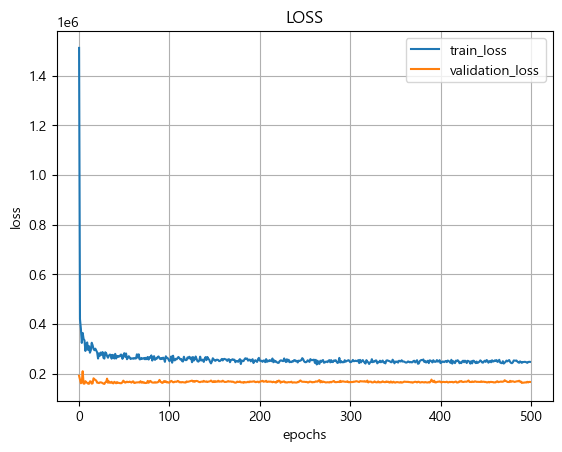

In [117]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

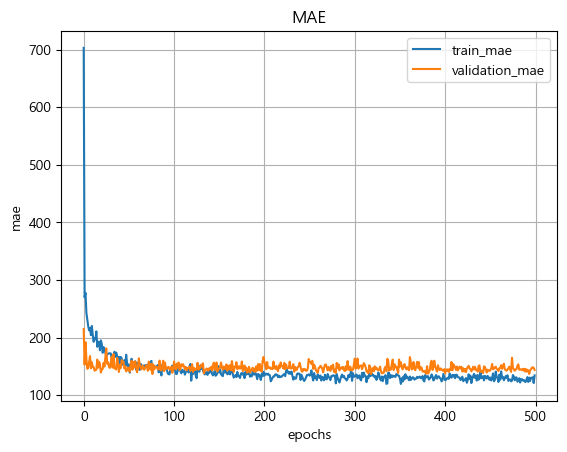

In [44]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")